In [1]:
import pandas as pd

# pandas functions

In [2]:
data=pd.read_csv("data_f.csv")

In [3]:
data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,None,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,None,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,None,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,None,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [4]:
#calculate mean of sale price wrt condition of the house:
# as we know the correlation between numeric variable and categorical variable cant be calculated we calculate the mean sale 
#price based on condition of the house

In [5]:
#initializing new column in datset:
data["column_sale"]=0

#calculating mean of sale price based on condition of the house
for i in data["Condition of the House"].unique():
    data["column_sale"][data["Condition of the House"]==str(i)] = data["Sale Price"][data["Condition of the House"]==str(i)].mean()
data["column_sale"]

C:\Users\vishvajeet\AppData\Local\Temp\ipykernel_83304\2786123987.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["column_sale"][data["Condition of the House"]==str(i)] = data["Sale Price"][data["Condition of the House"]==str(i)].mean()


0        542130.611206
1        542130.611206
2        542130.611206
3        612577.742504
4        542130.611206
             ...      
21608    542130.611206
21609    542130.611206
21610    542130.611206
21611    542130.611206
21612    542130.611206
Name: column_sale, Length: 21613, dtype: float64

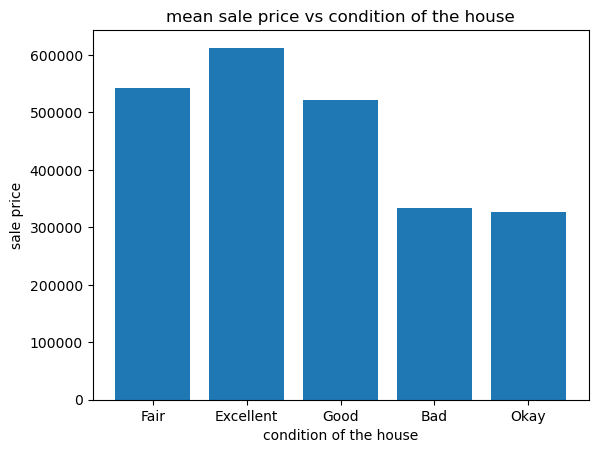

In [6]:
#plotting graph :
import matplotlib.pyplot as plt

plt.bar(data["Condition of the House"].unique(),data["column_sale"].unique())
plt.xlabel("condition of the house")
plt.ylabel("sale price")
plt.title("mean sale price vs condition of the house")
plt.show()

In [7]:
#calculating mean sale price based on more than two variables

data["column_sale1"]=0

S="Sale Price"
C="Condition of the House"
Z="Zipcode"

for i in data["Condition of the House"].unique():
    for j in data["Zipcode"].unique():
        data["column_sale1"][(data[C]==str(i)) & (data[Z]==j)]=data["Sale Price"][(data[C]==str(i)) & (data[Z]==j)].mean()



C:\Users\vishvajeet\AppData\Local\Temp\ipykernel_83304\577708614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["column_sale1"][(data[C]==str(i)) & (data[Z]==j)]=data["Sale Price"][(data[C]==str(i)) & (data[Z]==j)].mean()


In [8]:
len(data["column_sale1"].unique())

281

# this complex dependecy can be reduced using pandas.groupby() 

In [9]:
#calculating mean sale price based on condition of the house and zipcode
column_sale2 = data.groupby(["Condition of the House","Zipcode"])["Sale Price"].mean()
column_sale2

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

# pandas.pivot_table()

In [10]:
#calculating mean sale price based on condition of the house and zipcode using pandas.pivot_table():
import numpy as np
Column_sale3=pd.pivot_table(data,index=["Condition of the House","Zipcode"],values=["Sale Price"],aggfunc=np.mean)
Column_sale3


Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [11]:
#another way using pivot table which gives proper representation
Column_sale3=pd.pivot_table(data,index=["Zipcode"],columns=["Condition of the House"],values=["Sale Price"],aggfunc=np.mean)
Column_sale3

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

# Data Transformation: 

In [12]:
data["plot length"]=data["Flat Area (in Sqft)"]**0.5
data["plot length"].head() #this what a data transformation

0    34.351128
1    50.695167
2    27.748874
3    44.271887
4    40.987803
Name: plot length, dtype: float64

In [13]:
data["total area"]=data["Flat Area (in Sqft)"]+data["Lot Area (in Sqft)"]
data["total area"].head()

0     6830.0
1     9812.0
2    10770.0
3     6960.0
4     9760.0
Name: total area, dtype: float64

# pandas map function"

In [14]:
#data transformation:
#Example 1:

data["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

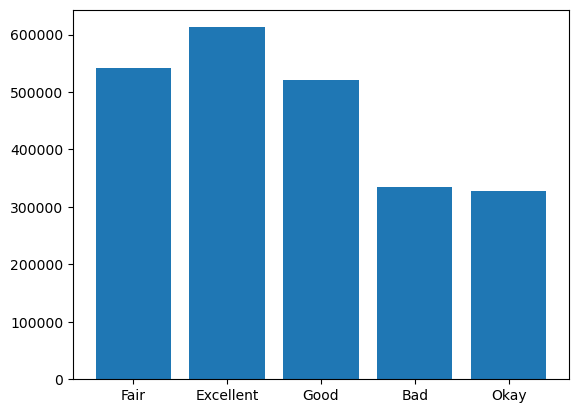

In [15]:
plt.bar(data["Condition of the House"].unique(),data["column_sale"].unique()) 
plt.show()

In [16]:
#here we see the bars of bad okay are nearly equivalent to each other and similary of fair
 #and good so now we convert this 5 conditios
#into 3 new conditions
data["Condition of the House"][data["Condition of the House"]=="Good"]="1"
data["Condition of the House"][data["Condition of the House"]=="Fair"]="1"
data["Condition of the House"][data["Condition of the House"]=="Bad"]="0"
data["Condition of the House"][data["Condition of the House"]=="Okay"]="0"
data["Condition of the House"][data["Condition of the House"]=="Excellent"]="3"
#this is it brute force approach

C:\Users\vishvajeet\AppData\Local\Temp\ipykernel_83304\555109500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Condition of the House"][data["Condition of the House"]=="Good"]="1"
C:\Users\vishvajeet\AppData\Local\Temp\ipykernel_83304\555109500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Condition of the House"][data["Condition of the House"]=="Fair"]="1"
C:\Users\vishvajeet\AppData\Local\Temp\ipykernel_83304\555109500.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [17]:
data["Condition of the House"].unique()

array(['1', '3', '0'], dtype=object)

#this can be done using pandas map function in better way

In [18]:
data["Condition of the House"]=data["Condition of the House"].map({"Good":"1",
                                                                   "Fair":"1",
                                                                   "Excellent":"3",
                                                                   "Bad":"0",
                                                                   "Okay":"0" })


In [19]:
data["Condition of the House"].unique()

array([nan], dtype=object)

In [20]:
#example 2: creating new column of year of house sold from date on house sold


data["Date House was Sold"]

0         14 October 2017
1        14 December 2017
2        15 February 2016
3        14 December 2017
4        15 February 2016
               ...       
21608         14 May 2017
21609    15 February 2016
21610        14 June 2017
21611     15 January 2016
21612     14 October 2017
Name: Date House was Sold, Length: 21613, dtype: object

In [21]:
year=[]
for i in range(len(data["Date House was Sold"])):
    k=data["Date House was Sold"][i].split()[-1]
    year.append(k)
data["year"]=year
data["year"].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year, dtype: object

In [22]:
#using map function:
def year(value):
    return value.split()[-1]

data["year_sold"]=data["Date House was Sold"].map(year)
data["year_sold"].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [23]:
#limitation of map function is that it will perform only on single variable.for multi variable we use apply()

# pandas apply() function

In [24]:
data["luxury_home"]=0

for i in range(len(data)):
    count=0
    if data["Waterfront View"][i]=="Yes":
        count=count+1
    if data["Condition of the House"][i] in ["Good","Excellent"]:
        count=count+1
    if data["Overall Grade"][i]>=8:
        count=count+1
    if count>=2:
        data["luxury_home"][i]="Yes"
    else:
        data["luxury_home"][i]="No"
        
data["luxury_home"].unique()

C:\Users\vishvajeet\AppData\Local\Temp\ipykernel_83304\1491670192.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["luxury_home"][i]="No"


array(['No', 'Yes'], dtype=object)

In [25]:
#same example using apply function

def luxury_home(row):
    count=0
    if row[0]=="Yes":
        count=count+1
    if row[1] in ["Good","Excellent"]:
        count=count+1
    if row[2]>=8:
        count=count+1
    if count>=2:
        return "Yes"
    else:
        return "NO"
    
data["luxury_home"]=data[["Waterfront View","Condition of the House","Overall Grade"]].apply(luxury_home,axis=1)
data["luxury_home"].unique()

array(['NO', 'Yes'], dtype=object)